In [1]:
using PGFPlots
using GridDensities

┌ Info: Recompiling stale cache file /Users/sydneykatz/.julia/compiled/v1.0/GridDensities/0fLC0.ji for GridDensities [30cfb417-a18a-4984-907c-c461bfb07c95]
└ @ Base loading.jl:1184


In [2]:
include("support_code.jl");

In [3]:
d1 = GridDensity(rand(8), [0.0, 0.0], [2.0, 4.0], [2, 4]);
d2 = GridDensity(collect(1:8), [0.0, 0.0], [2.0, 4.0], [2, 4]);

In [12]:
function get_heat1(x, y)
    return -pdf(d1, [x,y])
end

function get_heat2(x, y)
    return pdf(d2, [x,y])
end

get_heat2 (generic function with 1 method)

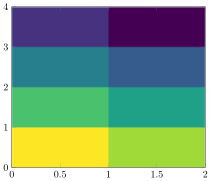

In [13]:
ax = Axis(Plots.Image(get_heat2, (0,2), (0,4), colormap=pasteljet, colorbar=false))

In [17]:
numsamps = 100000
samples = rand(d2, numsamps);

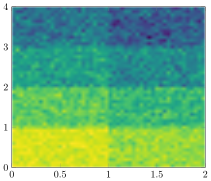

In [18]:
xvals = [samples[i][1] for i = 1:numsamps]
yvals = [samples[i][2] for i = 1:numsamps]
ax = Axis(Plots.Histogram2(xvals, yvals, xmin=0, xmax=2, ymin=0, ymax=4, colormap=pasteljet, colorbar=false))

In [25]:
ax1 = Axis(Plots.Image(get_heat2, (0,2), (0,4), colormap=pasteljet, colorbar=false))
ax1.title = "Probability Density Function (PDF)"
ax2 = Axis(Plots.Histogram2(xvals, yvals, xmin=0, xmax=2, ymin=0, ymax=4, colormap=pasteljet, colorbar=false))
ax2.title = "Histogram of 1,000,000 Samples"
g = GroupPlot(2, 1, groupStyle = "horizontal sep = 1.75cm")
push!(g, ax1)
push!(g, ax2)
PGFPlots.save("grid_density_ex.pdf", g)
g